# <u>Background</u>: Impacts of Falls Lake on Stream Flow
These exercises build off the Excel Water Flow examples covered in the last data analytics session. To remind you, in those exercises we wanted to answer the general question: **How did construction of Falls Lake reservoir affect downstream flow?**. And in particular, we refined our question to address the following: 
* Do plots of monthly average streamflow look different for the period of data taken before Falls lake (1930-1980) than from the period after (1984-2017)?

* What are the streamflows associated with 100, 500, and 1000 year floods? Have they changed since the reservoir was constructed?

* Has Falls lake succeeded in minimizing the frequency of low flow events? 

## The analytical workflow
To answer these questions, we walk through a series of steps - *the analytical workflow* - which includes:
* locating the data
* getting the data into our analytical environment
* tidying the data for efficient analysis
* executing our analysis
* visualizing output
* evaluating our results and repeating as necessary

Here in this notebook, we begin this process using Python, demonstrating how select Python packages (also called "modules" or "libraries") help us in downloading and formatting our data. 

---
# • Importing data
This notebook demonstrates how Python, using the `requests`, `io`, and `pandas` libraries, can generate a working dataset from on-line resources. Specifically, this notebook forms a request to a web service, here the NWIS API, and handles the response in such a way as to form a tidy data frame, which is saved as a comma separated value (CSV) formatted file on the local disk. 

### Water flow data for the Neuse River near Clayton gage site. 
The data we want, namely mean daily stream flow for a site downstream of Falls Lake, resides on the National Water Information System's (NWIS) servers. Recall the procedure we used in the Excel exercise to locate and query this server to reveal data for the Neuse River near Clayton gage site. The result was presented as a web page, and the URL of that web page (provided below) actually contained all the instructions necessary to generate the data we wanted. In other words, we can manipulate this address and easly get data for a different site or for a different time range. 

All this is by design (something called a *REST API* or *web service*- another topic beyond the scope of today), and it allows us to leverage Python tools to programmatically pull data into our analysis environment. Examination of the service documentation reveals we can pull a lot more than daily stream flow, and we'll revisit that idea later...

Service Documentation:
https://waterservices.usgs.gov/rest/DV-Test-Tool.html

Example request in URL format:<br>
http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=02089000&startDT=1930-10-01&endDT=2017-09-30&statCd=00003&parameterCd=00060&siteStatus=all

#### Import the Python libraries required to run the script
Like *R*, Python has a huge developer environment, and these developers are constantly creating new libraries that run specific tasks. Here we load these into our current scripting environment.<br><br>

<font color=#767676 size="2">*Note: While many 3rd party libraries may be included in your default Python installation, some are not an need to be **installed** prior importing them in a script. We examined how the `requests` library was manually installed in the setup for this exercise.*</font>

In [1]:
#Import the Pandas library
import pandas as pd

In [81]:
#Retrieve the data directly into a Pandas data frame named 'df'
url = 'http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=02087500&startDT=1930-10-01&endDT=2017-09-30&statCd=00003&parameterCd=00060&siteStatus=all'
df = pd.read_csv(url,
                 skiprows=31,
                 sep='\t',
                 names=['agency_cd','site_no','datetime','MeanFlow_cfs','Confidence'],
                 dtype={'site_no':'str'},
                 parse_dates=['datetime'],
                 index_col='datetime'
                )

#### Plot the data
Ok, we now have a local copy of the data, let's plot it!

In [76]:
#This statements enables plots in our Jupyter notebook
%matplotlib inline

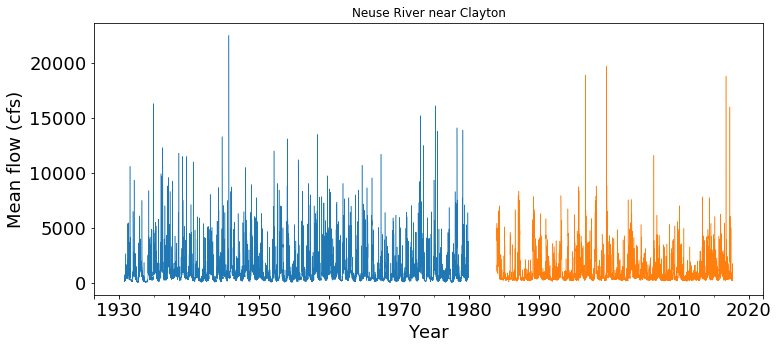

In [95]:
#Plot the data: Start with data up to 1980
ax = df[:'1979-12-31']['MeanFlow_cfs'].plot(title="Neuse River near Clayton",
                                            linewidth=0.5,
                                            figsize=(12,5),
                                            fontsize=18)
#...add the data from 1984 on
df['1984-01-01':]['MeanFlow_cfs'].plot(linewidth=0.5)

#...add some aesthetics
ax.set_ylabel("Mean flow (cfs)",fontsize=18)
ax.set_xlabel("Year",fontsize=18);

Boom! That was fast! 

Well, it was fast and we didn't learn much. Let's pause and go through this a bit more carefully, picking up some of some of the rich features we just glossed over. 